In [1]:
import numpy
from astropy import units
from galpy.potential import LogarithmicHaloPotential
from galpy.orbit import Orbit
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.df import streamdf
from galpy.util import bovy_conversion
from galpy.util import bovy_plot
bovy_plot.bovy_print(axes_labelsize=17.,text_fontsize=12.,
                     xtick_labelsize=15.,ytick_labelsize=15.)
from streamtools.df import streamspraydf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Example of Fardal et al. (2015) stream-spray method

Using the same orbit, potential, and cluster mass as in [Bovy (2014)](http://adsabs.harvard.edu/abs/2014ApJ...795...95B):

In [2]:
o= Orbit([1.56148083,0.35081535,-1.15481504,0.88719443,-0.47713334,0.12019596])
lp= LogarithmicHaloPotential(normalize=1.,q=0.9)

In [3]:
spdf= streamspraydf(2*10.**4.*units.Msun,progenitor=o,pot=lp,tdisrupt=4.5*units.Gyr)
spdft= streamspraydf(2*10.**4.*units.Msun,progenitor=o,pot=lp,leading=False,tdisrupt=4.5*units.Gyr)

First, let's check that the integration is working. We generate a set of stars that is sitting just outside the progenitor:

In [4]:
numpy.random.seed(4)
RvR_noint,dt_noint= spdf.sample(n=100,returndt=True,integrate=False)
RvRt_noint,dtt_noint= spdft.sample(n=100,returndt=True,integrate=False)

Now we generate the same sample of stars (by setting the random seed to the same value), but have the code integrate them forward:

In [5]:
numpy.random.seed(4)
RvR,dt= spdf.sample(n=100,returndt=True,integrate=True)
RvRt,dt= spdft.sample(n=100,returndt=True,integrate=True)

In [6]:
print (RvR[0])

[2.10064133 1.95304846 1.88660577 1.94773761 1.86745924 1.62133239
 2.03006294 1.54926153 1.62133046 1.70712111 1.94221551 1.6300748
 2.03472738 2.02678403 1.60004233 1.74074393 1.55447284 1.70490587
 1.56765181 1.99190109 1.74863561 1.98573549 1.89846668 1.95712019
 1.56933388 1.57473995 1.94300486 1.63216092 2.03838198 1.6598002
 1.66740665 1.98368375 1.73319721 1.59045573 1.60265961 1.64022303
 1.83362396 1.98896634 1.66533766 1.77215048 1.66668833 1.74467688
 1.93187391 1.69785624 1.65369314 1.77320067 1.95676611 1.6966661
 1.6960904  1.85974868 1.96327267 1.66894502 1.92802378 1.6594985
 1.79428386 1.6680401  1.98181373 1.8027913  1.89258435 1.73696269
 1.99945123 1.66934864 1.61986215 1.66488932 1.8764329  1.88428078
 1.83018972 1.57258471 1.6735688  1.66044609 1.78949617 2.07671181
 1.78375436 1.79030837 1.5733788  1.72273473 1.60208527 1.9235487
 1.72922096 1.97091195 1.56497862 1.6003789  1.8266588  1.88814424
 1.78482442 1.832806   1.61807479 1.80006198 1.64673588 1.92456532


Let's now integrate the 'not-integrated' set by hand:

In [7]:
# Leading
for ii in range(len(dt_noint)):
    to= Orbit(RvR_noint[:,ii])
    to.integrate(numpy.linspace(-dt_noint[ii],0.,1001),lp)
    RvR_noint[:,ii]= [to.R(0.),to.vR(0.),to.vT(0.),to.z(0.),to.vz(0.),to.phi(0.)]
# Trailing
for ii in range(len(dtt_noint)):
    to= Orbit(RvRt_noint[:,ii])
    to.integrate(numpy.linspace(-dtt_noint[ii],0.,1001),lp)
    RvRt_noint[:,ii]= [to.R(0.),to.vR(0.),to.vT(0.),to.z(0.),to.vz(0.),to.phi(0.)]

Compare them one-to-one

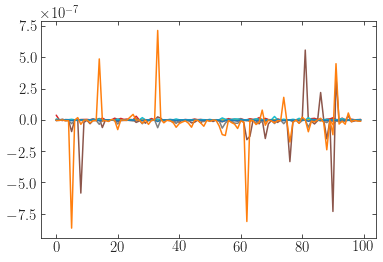

In [8]:
plot(((RvR_noint-RvR)/RvR).T);
plot(((RvRt_noint-RvRt)/RvR).T);

Very small differences, consistent with integration errors. Now let's look at the stream! First we integrate the progenitor forward and backward for a short time, so we can show its path. We also setup ``galpy.df.streamdf`` objects which model the same track with a frequency-angle framework:

In [9]:
ts= numpy.linspace(0.,3.,301)
o.integrate(ts,lp)
of= o()
of.integrate(-ts,lp)

In [10]:
aAIA= actionAngleIsochroneApprox(b=0.8,pot=lp)
sigv= 0.365 #km/s
sdf= streamdf(sigv/220.,progenitor=o(),pot=lp,aA=aAIA,leading=True,
              nTrackChunks=11,tdisrupt=4.5*units.Gyr)
sdft= streamdf(sigv/220.,progenitor=o(),pot=lp,aA=aAIA,leading=False,
               nTrackChunks=11,tdisrupt=4.5*units.Gyr)

In [11]:
# Sample again to get more stars
RvR,dt= spdf.sample(n=300,returndt=True,integrate=True)
RvRt,dt= spdft.sample(n=300,returndt=True,integrate=True)

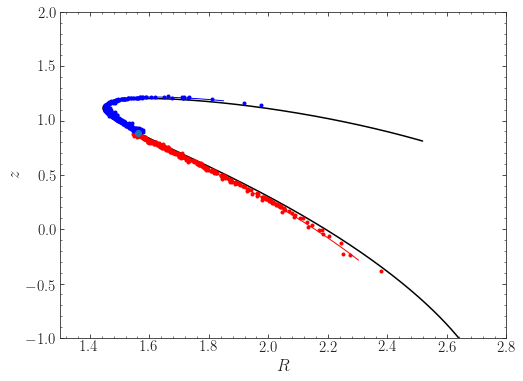

In [12]:
figsize(8,6)
o.plot(color='k',xrange=[1.3,2.8],yrange=[-1.,2.])
of.plot(overplot=True,color='k')
plot(RvR[0],RvR[3],'r.')
plot(RvRt[0],RvRt[3],'b.')
sdf.plotTrack(d1='R',d2='z',interp=True,color='r',overplot=True,lw=1.)
sdft.plotTrack(d1='R',d2='z',interp=True,color='b',overplot=True,lw=1.)
plot(o.R(),o.z(),'o');

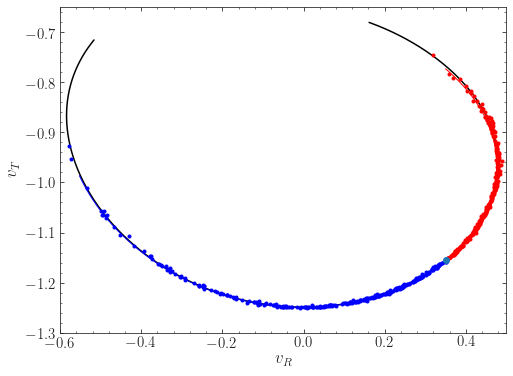

In [13]:
o.plot(d1='vR',d2='vT',color='k',xrange=[-0.6,0.5],yrange=[-1.3,-0.65])
of.plot(d1='vR',d2='vT',overplot=True,color='k')
plot(RvR[1],RvR[2],'r.')
plot(RvRt[1],RvRt[2],'b.')
sdf.plotTrack(d1='vR',d2='vT',interp=True,color='r',overplot=True,lw=1.)
sdft.plotTrack(d1='vR',d2='vT',interp=True,color='b',overplot=True,lw=1.)
plot(o.vR(),o.vT(),'o');

These match remarkably well! Let's take a look at the action-angle coordinates for this stream:

In [14]:
jrp,jpp,jzp,Orp,Opp,Ozp,arp,app,azp= aAIA.actionsFreqsAngles(o())
jr,jp,jz,Or,Op,Oz,ar,ap,az= aAIA.actionsFreqsAngles(*RvR)
jrt,jpt,jzt,Ort,Opt,Ozt,art,apt,azt= aAIA.actionsFreqsAngles(*RvRt)
# Center angles around pi
ar=  (ar-arp+numpy.pi) % (2.*numpy.pi)
art= (art-arp+numpy.pi) % (2.*numpy.pi)
ap=  (ap-app+numpy.pi) % (2.*numpy.pi)
apt= (apt-app+numpy.pi) % (2.*numpy.pi)
az=  (az-azp+numpy.pi) % (2.*numpy.pi)
azt= (azt-azp+numpy.pi) % (2.*numpy.pi)

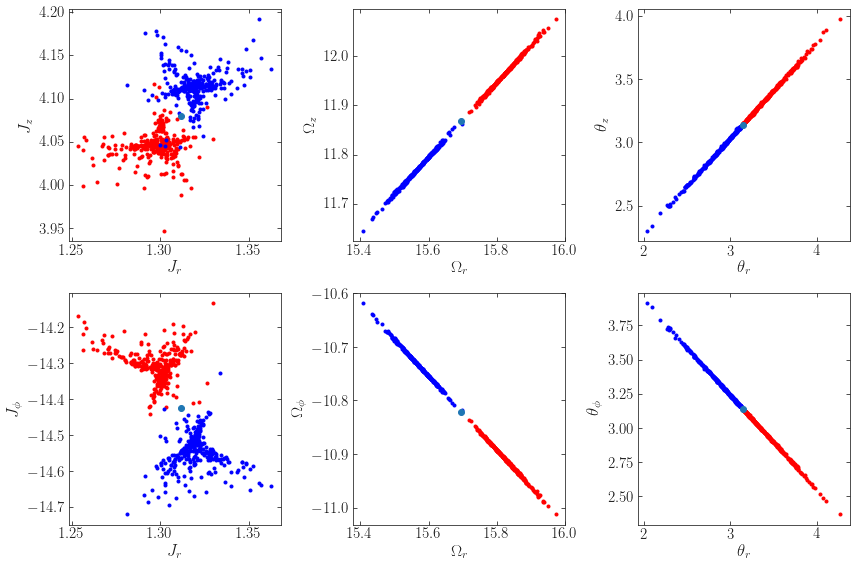

In [15]:
figsize(12,8)
actionsFac= 8.
freqFac= bovy_conversion.freq_in_Gyr(220.,8.)
subplot(2,3,1)
plot(jr*actionsFac,jz*actionsFac,'r.')
plot(jrt*actionsFac,jzt*actionsFac,'b.')
plot(jrp*actionsFac,jzp*actionsFac,'o')
xlabel(r'$J_r$'); ylabel(r'$J_z$')
subplot(2,3,2)
plot(Or*freqFac,Oz*freqFac,'r.')
plot(Ort*freqFac,Ozt*freqFac,'b.')
plot(Orp*freqFac,Ozp*freqFac,'o')
xlabel(r'$\Omega_r$'); ylabel(r'$\Omega_z$')
subplot(2,3,3)
plot(ar,az,'r.')
plot(art,azt,'b.')
plot(numpy.pi,numpy.pi,'o')
xlabel(r'$\theta_r$'); ylabel(r'$\theta_z$')
subplot(2,3,4)
plot(jr*actionsFac,jp*actionsFac,'r.')
plot(jrt*actionsFac,jpt*actionsFac,'b.')
plot(jrp*actionsFac,jpp*actionsFac,'o')
xlabel(r'$J_r$'); ylabel(r'$J_\phi$')
subplot(2,3,5)
plot(Or*freqFac,Op*freqFac,'r.')
plot(Ort*freqFac,Opt*freqFac,'b.')
plot(Orp*freqFac,Opp*freqFac,'o')
xlabel(r'$\Omega_r$'); ylabel(r'$\Omega_\phi$')
subplot(2,3,6)
plot(ar,ap,'r.')
plot(art,apt,'b.')
plot(numpy.pi,numpy.pi,'o')
xlabel(r'$\theta_r$'); ylabel(r'$\theta_\phi$')
tight_layout();

These look very similar to those in Bovy (2014)!

**LAST CELL, HIDDEN**